<h1>Levenberg-Marquardt Verfahren</h1>

<h2>Motivation</h2>

<font size="3" face="Verdana">
<p style="text-align:justify">Das Levenberg-Marquardt Verfahren kombiniert die Vorteile des Gauss-Newton Verfahrens mit denen des Gradientenabstiegsverfahrens. Das bedeutet, für schlechte Startparameter wird zunächst eine Art Gradientenabstiegsverfahren angewandt und sobald die Parameter nahe des Optimums sind, konvergiert es wie im Gauss-Newton Verfahren.
Im Gegensatz zum Gauss-Newton Verfahren konvergiert es somit meist auch bei schlechten Startparametern. Für gute Startparameter kann es hingegen etwas langsamer sein.</p>
<p style="text-align:justify">Das hier vorgestellte Verfahren orientiert sich an Transtrum et al.<sup>[1]</sup> </p>
</font>

<h2>Verfahren</h2>

<font size="3" face="Verdana">
<p style="text-align:justify">Bevor das Levenberg-Marquardt Verfahren angewendet werden kann, muss eine Funktion gefunden werden, die das Verhalten der Kurve bestimmt:</p>
    
\begin{align}
f(p)
\end{align}

<p style="text-align:justify">Daraus lässt sich dann eine Fehlerfunktion bestimmen, die minimiert werden muss um die optimalen Parameter zu finden:</p>

\begin{align}
r = y - f(p) = F(p) = [F_1(p_1,...,p_n),...,F_m(p_1,...,p_n)]^T 
\end{align}

<p style="text-align:justify">$F_1$ bis $F_m$ unterscheiden sich dabei nur in den eingesetzten Messpunkten.</p>

<p style="text-align:justify">Außerdem müssen noch die $n$ Startparameter geschätzt werden:</p>

\begin{align}
p^{(0)} = [p_1^{(0)},...,p_n^{(0)}]
\end{align}

<h4>1. Berechnen der Fehlerfunktion mit den Startparametern:</h4>

<p style="text-align:justify">Im ersten Schritt werden die Werte der Fehlerfunktion mithilfe der geschätzten Startparameter und den $m$ Messpunkten berechnet:</p>

\begin{align}
r = 
\begin{bmatrix} 
       r_{1}   \\
       \dots   \\
       r_{m}   \\
       \end{bmatrix} = 
       \begin{bmatrix} 
       F_{1}(p_1^{(0)},...,p_n^{(0)})   \\
       \dots   \\
       F_{m}(p_1^{(0)},...,p_n^{(0)})   \\
       \end{bmatrix}
\end{align}

<h4>2. Berechnen der Jakobi-Matrix für die Fehlerfunktion:</h4>

<p style="text-align:justify">Dannach wird die Jakobi-Matrix der Fehlerfunktion berechnet.
Dazu werden zuerst die partiellen Ableitungen der Fehlerfunktion nach den Parametern $p_1$ bis $p_n$ gebildet und dann durch Einsetzten der Startparameter und Messpunkte die Einträge der Jakobi-Matrix berechnet.</p>

\begin{align}
       J =
       \begin{bmatrix} 
       \frac{\partial r_{1}}{\partial p_{1}} & \ldots  & \frac{\partial r_{1}}{\partial p_{n}}  \\
       \vdots & \ddots & \vdots  \\
       \frac{\partial r_{m}}{\partial p_{1}} & \ldots & \frac{\partial r_{n}}{\partial p_{n}}  \\
       \end{bmatrix}
\end{align}

<h4>3. Kostengradient berechnen:</h4>

<p style="text-align:justify">Der Gradient wird folgendermaßen berechnet:</p>

\begin{align}
       G = J^T J + \lambda I =
       \begin{bmatrix} 
       \frac{\partial r_{1}}{\partial p_{1}} & \ldots & \frac{\partial r_{m}}{\partial p_{1}}  \\
       \vdots & \ddots & \vdots   \\
       \frac{\partial r_{1}}{\partial p_{n}} & \ldots & \frac{\partial r_{n}}{\partial p_{n}}   \\
       \end{bmatrix}*
       \begin{bmatrix} 
       \frac{\partial r_{1}}{\partial p_{1}} & \ldots  & \frac{\partial r_{1}}{\partial p_{n}}  \\
       \vdots & \ddots & \vdots  \\
       \frac{\partial r_{m}}{\partial p_{1}} & \ldots & \frac{\partial r_{n}}{\partial p_{n}}  \\
       \end{bmatrix}
       + \lambda *
       \begin{bmatrix} 
       1 & 0 & 0   \\
       0 & 1 & 0   \\
       0 & 0 & 1   \\
       \end{bmatrix}
\end{align}

<p style="text-align:justify">Die Bestimmung von $\lambda$ wird in Schritt 5 ausführlich erklärt.</p>

<p style="text-align:justify">Dann wird der Kostengradient berechnet:</p>

\begin{align}
       C_{gradient} = J^T r =
       \begin{bmatrix} 
       \frac{\partial r_{1}}{\partial p_{1}} & \ldots & \frac{\partial r_{m}}{\partial p_{1}}  \\
       \vdots & \ddots & \vdots   \\
       \frac{\partial r_{1}}{\partial p_{n}} & \ldots & \frac{\partial r_{n}}{\partial p_{n}}   \\
       \end{bmatrix} * 
       \begin{bmatrix} 
       r_{1}   \\
       \vdots   \\
       r_{m}   \\
       \end{bmatrix}
\end{align}

<p style="text-align:justify">Und die Kosten:</p>

\begin{align}
       Cost = 0.5 * \|r\|^2 = 0.5 * \sqrt{(r_1)^2+\ldots+(r_m)^2}^2
\end{align}

<h4>4. Parameter, Fehlerfunktion und Kosten aktualisieren:</h4>

<p style="text-align:justify">Nun können die Parameter aktualisiert werden:</p>

\begin{align}
        p_{neu} = p - G^{-1}*C_{gradient}
\end{align}

<p style="text-align:justify">Fehlerfunktion aktualisieren:</p>

\begin{align}
       r_{neu} =
       \begin{bmatrix} 
       r_{1}   \\
       \dots   \\
       r_{m}   \\
       \end{bmatrix} = 
       \begin{bmatrix} 
       F_{1}(p_{neu})   \\
       \dots   \\
       F_{m}(p_{neu})   \\
       \end{bmatrix}
\end{align}

<p style="text-align:justify">Kosten aktualisieren:</p>

\begin{align}
        Cost_{neu} = 0.5 * \|r\|^2 = 0.5 * \sqrt{(r_{neu, 1})^2+\ldots+(r_{neu, m})^2}^2
\end{align}

<h4>5. Schritt evaluieren und $\lambda$ aktualisieren:</h4>

<p style="text-align:justify">Wenn die Kosten durch den Schritt geringer werden, also: $Cost_{neu} < Cost$ dann soll der Schritt durchgeführt werden:</p>

<p style="text-align:justify">$p = p_{neu}$</p>
<p style="text-align:justify">$r = r_{neu}$</p>
<p style="text-align:justify">$Cost = Cost_{neu}$</p>
<p style="text-align:justify">$\lambda$ wird reduziert: $\lambda = \frac{\lambda}{\lambda_{down}}$ wodurch sich die Berechnungen langsam an das Gauss-Newton Verfahren annähern.</p>

<p style="text-align:justify">Werden die Kosten nicht geringer, wird der Schrtitt nicht durchgeführt:</p>

<p style="text-align:justify">Behalte die alten $p, r$ und $Cost$ und erhöhe $\lambda$:
$\lambda = \lambda*\lambda_{up}$</p>

<p style="text-align:justify">$\lambda$ gibt die Schrittgröße an und sollte für ein gutes Ergebnis in jedem Durchgang aktualisiert werden. Dafür gibt es viele unterschiedliche Methoden. Eine einfache Möglichkeit ist es, $\lambda$ um einen Faktor $\lambda_{down}$ zu verkleinern falls der Schritt akzeptiert wurde und um einen Faktor $\lambda_{up}$ zu vergrößern falls der Schritt verworfen wurde. Häufig werden bessere Ergebnisse erziehlt, wenn $\lambda_{down}$ größer ist als $\lambda_{up}$. Allerdings sind die optimalen $\lambda$-Werte für jedes Problem anders, sodass keine allgemeingültige Aussage darüber getroffen werden kann. </p>

<p style="text-align:justify">Nun wird mit den aktualisierten Werten wieder bei Schritt 2 begonnen und so lange wiederholt bis die Kosten sich nicht mehr oder nur sehr gering verringern, oder $\|r\| < \varepsilon$.</p>
</font>

<h2>Beispiel </h2>

<font size="3" face="Verdana">
<p style="text-align:justify">Gegeben sind vier Messpunkte (Tabelle 1), deren Lage durch einen Kreis beschrieben werden kann (siehe Bild 1).</p>

<div class="container">
    
   <div style="float:left;width:30%">
        <table style="width:30%">
          <caption align="bottom">Tabelle 1: Messpunkte</caption>
          <tr>
            <th>x1</th>
            <th>x2</th>
          </tr>
          <tr>
            <td>3</td>
            <td>4</td>
          </tr>
          <tr>
            <td>3.982</td>
            <td>2.279</td>
          </tr>
          <tr>
            <td>5</td>
            <td>6</td>
          </tr>
          <tr>
            <td>6.275</td>
            <td>5.541</td>
          </tr>
        </table>
   </div>
    
   <div style="float:left;width:30%">
        <figure>
            <img src="Kreis.png" style="width:50%">
            <figcaption style="text-align:center"> Bild 2 </figcaption>
        </figure>
   </div>
    
</div>

<p style="text-align:justify">Es sollen die Werte für z1, z2 und R (siehe Bild 2) optimiert werden.</p>
<br />
<br />
<figure>
    <img src="KreisVariablen.png" style="width:20%">
    <figcaption style="text-align:center"> Bild 2 </figcaption>
</figure>


<p style="text-align:justify">Ein Kreis kann beschrieben werden durch: </p>

\begin{align}
f(x_{1}, x_{2}) = (z_{1} - x_{1})^{2} + (z_{2} - x_{2})^{2} - R^{2}
\end{align}

<p style="text-align:justify">oder in Bezug auf die zu optimierenden Parameter durch:</p>

\begin{align}
f(z_{1}, z_{2}, R) = (z_{1} - x_{1})^{2} + (z_{2} - x_{2})^{2} - R^{2}
\end{align}

<p style="text-align:justify">Weiteres Umformen ergibt die Fehlerfunktion:</p>

\begin{align}
R^{2} = (z_{1} - x_{1})^{2} + (z_{2} - x_{2})^{2}
\end{align}

\begin{align}
R = \sqrt{(z_{1} - x_{1})^{2} + (z_{2} - x_{2})^{2}}
\end{align}

\begin{align}
R = \|z-x\|
\end{align}

\begin{align}
F(z_{1}, z_{2}, R) = R - \|z-x\| = R - \sqrt{(z_{1} - x_{1})^{2} + (z_{2} - x_{2})^{2}}
\end{align}

<p style="text-align:justify">Als Startparameter werden die folgenden Werte festgelegt:</p>

\begin{align}
p = [5.5, 4.3, 1.9]^{T}
\end{align}

<br />
<br />
<h4>1. Berechnen der Fehlerfunktion mit den Startparametern:</h4>

<p style="text-align:justify">Für jeden der vier Messpunkte wird mithilfe der Startparameter der Wert der Fehlerfunktion berechnet und als Vektor dargestellt:</p>

\begin{align}
r_{i} = 1.9 - \sqrt{(5.5-x_{i1})^{2} + (4.3-x_{i2})^{2}}
\end{align}

\begin{align}
       \begin{bmatrix} 
       r_{1}   \\
       r_{2}   \\
       r_{3}   \\
       r_{4}   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       1.9 - \sqrt{(5.5-3)^{2} + (4.3-4)^{2}}   \\
       1.9 - \sqrt{(5.5-3.982)^{2} + (4.3-2.279)^{2}}   \\
       1.9 - \sqrt{(5.5-5)^{2} + (4.3-6)^{2}}   \\
       1.9 - \sqrt{(5.5-6.275)^{2} + (4.3-5.541)^{2}}   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       -0.61794   \\
       -0.62760   \\
       0.12800   \\
       0.43688   \\
       \end{bmatrix}
\end{align}

<br />
<br />
<h4>2. Berechnen der Jacobi-Matrix für die Fehlerfunktion:</h4>

<p style="text-align:justify">Mithilfe der Ableitungsregeln:</p>

\begin{align}
f(x) = \sqrt{x} \longrightarrow f'(x) = \frac{1}{2 \sqrt{x}}
\end{align}

\begin{align}
f(x) = g(h(x)) \longrightarrow f'(x) = g'(h(x)) * h*(x)
\end{align}

<p style="text-align:justify">kann die Fehlerfunktion jeweils nach einem der drei Parameter abgeleitet werden:</p>

\begin{align}
\frac{\partial r_{i}}{\partial z_{1}} = - \frac{1}{2 \sqrt{(z_{1}-x_{i1})^{2} + (z_{2}-x_{i2})^{2}}} * 2(z_{1}-x_{i1}) = - \frac{(z_{1}-x_{i1})}{\|z-x_{i}\|}
\end{align}

\begin{align}
\frac{\partial r_{i}}{\partial z_{2}} = - \frac{(z_{2}-x_{i2})}{\|z-x_{i}\|}
\end{align}

\begin{align}
\frac{\partial r_{i}}{\partial r} = 1
\end{align}

<p style="text-align:justify">Daraus können dann die Einträge der Jacobi-Matrix berechnet werden:</p>

\begin{align}
       J =
       \begin{bmatrix} 
       \frac{\partial r_{1}}{\partial p_{1}} & \ldots  & \frac{\partial r_{1}}{\partial p_{n}}  \\
       \vdots & \ddots & \vdots  \\
       \frac{\partial r_{m}}{\partial p_{1}} & \ldots & \frac{\partial r_{n}}{\partial p_{n}}  \\
       \end{bmatrix} =
       \begin{bmatrix} 
       \frac{\partial r_{1}}{\partial z_{1}} & \frac{\partial r_{1}}{\partial z_{2}} & \frac{\partial r_{1}}{\partial r}   \\
       \frac{\partial r_{2}}{\partial z_{1}} & \frac{\partial r_{2}}{\partial z_{2}} & \frac{\partial r_{2}}{\partial r}   \\
       \frac{\partial r_{3}}{\partial z_{1}} & \frac{\partial r_{3}}{\partial z_{2}} & \frac{\partial r_{3}}{\partial r}   \\
       \frac{\partial r_{4}}{\partial z_{1}} & \frac{\partial r_{4}}{\partial z_{2}} & \frac{\partial r_{4}}{\partial r}   \\
       \end{bmatrix} = 
       \begin{bmatrix} 
       -\frac{z_1-x_{11}}{\|z-x_1\|} & -\frac{z_2-x_{12}}{\|z-x_2\|} & 1   \\
       -\frac{z_1-x_{21}}{\|z-x_2\|} & -\frac{z_2-x_{22}}{\|z-x_2\|} & 1   \\
       -\frac{z_1-x_{31}}{\|z-x_3\|} & -\frac{z_2-x_{32}}{\|z-x_3\|} & 1   \\
       -\frac{z_1-x_{41}}{\|z-x_4\|} & -\frac{z_2-x_{42}}{\|z-x_4\|} & 1   \\
       \end{bmatrix} = 
       \begin{bmatrix} 
       -\frac{5.5-3}{\sqrt{(5.5-3)^2+(4.3-4)^2}} & -\frac{4.3-4}{\sqrt{(5.5-3)^2+(4.3-4)^2}} & 1   \\
       -\frac{5.5-3.982}{\sqrt{(5.5-3.982)^2+(4.3-2.279)^2}} & -\frac{4.3-2.279}{\sqrt{(5.5-3)^2+(4.3-2.279)^2}} & 1   \\
       -\frac{5.5-5}{\sqrt{(5.5-5)^2+(4.3-6)^2}} & -\frac{4.3-6}{\sqrt{(5.5-5)^2+(4.3-6)^2}} & 1   \\
       -\frac{5.5-6.275}{\sqrt{(5.5-6.275)^2+(4.3-5.541)^2}} & -\frac{4.3-5.541}{\sqrt{(5.5-6.275)^2+(4.3-5.541)^2}} & 1   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       -0.99288 & -0.11915 & 1   \\
       -0.60057 & -0.79957 & 1   \\
       -0.28217 & 0.95937 & 1   \\
       0.52969 & 0.84819 & 1   \\
       \end{bmatrix}
\end{align}

<br />
<br />
<h4>3. Kostengradient berechnen:</h4>

<p style="text-align:justify">$\lambda$ wird zu Beginn auf 1 gesetzt. $\lambda_{down} = 10$ und $\lambda_{up} = 1.5$.</p>
<p style="text-align:justify">Gradient berechnen:</p>

\begin{align}
       G = J^T J + \lambda I =
       \begin{bmatrix} 
       -0.99288 & -0.60057 & -0.28217 & 0.52969  \\
       -0.11915 & -0.79957 & 0.95937 & 0.84819   \\
       1 & 1 & 1 & 1   \\
       \end{bmatrix}
       \begin{bmatrix} 
       -0.99288 & -0.11915 & 1   \\
       -0.60057 & -0.79957 & 1   \\
       -0.28217 & 0.95937 & 1   \\
       0.52969 & 0.84819 & 1   \\
       \end{bmatrix}
       + 1 *
       \begin{bmatrix} 
       1 & 0 & 0   \\
       0 & 1 & 0   \\
       0 & 0 & 1   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       1.70669 & 0.77707 & -1.34593   \\
       0.77707 & 2.29333 & 0.88884   \\
       -1.34593 & 0.88884 & 4   \\
       \end{bmatrix}
       + 1 *
       \begin{bmatrix} 
       1 & 0 & 0   \\
       0 & 1 & 0   \\
       0 & 0 & 1   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       2.70669 & 0.77707 & -1.34593   \\
       0.77707 & 3.29333 & 0.88884   \\
       -1.34593 & 0.88884 & 5   \\
       \end{bmatrix}
\end{align}

<p style="text-align:justify">Kostengradient berechnen:</p>

\begin{align}
       C_{gradient} = J^T r =
       \begin{bmatrix} 
       -0.99288 & -0.60057 & -0.28217 & 0.52969  \\
       -0.11915 & -0.79957 & 0.95937 & 0.84819   \\
       1 & 1 & 1 & 1   \\
       \end{bmatrix} * 
       \begin{bmatrix} 
       -0.61794   \\
       -0.62760    \\
       0.12800    \\
       0.43688    \\
       \end{bmatrix} = 
       \begin{bmatrix} 
       1.18575   \\
       1.06879    \\
       -0.68066    \\
       \end{bmatrix}
\end{align}

<p style="text-align:justify">Kosten berechnen:</p>

\begin{align}
       Cost = 0.5 * \|r\|^2 = 0.5 * \sqrt{(-0.61794)^2+(-0.6276)^2+0.128^2+0.43688^2}^2 = 0.49149
\end{align}

<h4>4. Parameter, Fehlerfunktion und Kosten aktualisieren:</h4>

<p style="text-align:justify">Parameter aktualisieren:</p>

\begin{align}
        p_{neu} = p - (G^{-1}*C_{gradient}) =
       \begin{bmatrix} 
       5.5   \\
       4.3    \\
       1.9    \\
       \end{bmatrix} - 
       \left (
       \begin{bmatrix} 
       0.4963 & -0.16088 & 0.16219   \\
       -0.16088 & 0.37110 & -0.10927    \\
       0.16219 & -0.10927 & 0.26309    \\
       \end{bmatrix} *
       \begin{bmatrix} 
       1.18575   \\
       1.06879    \\
       -0.68066    \\
       \end{bmatrix}
       \right ) =
       \begin{bmatrix} 
       5.5   \\
       4.3    \\
       1.9    \\
       \end{bmatrix} -
       \begin{bmatrix} 
       0.30614   \\
       0.28024    \\
       -0.10354    \\
       \end{bmatrix} =
       \begin{bmatrix} 
       5.19386   \\
       4.01976    \\
       2.00354    \\
       \end{bmatrix}
\end{align}

<p style="text-align:justify">Fehlerfunktion aktualisieren:</p>

\begin{align}
       r_{neu} =
       \begin{bmatrix} 
       r_{1}   \\
       r_{2}   \\
       r_{3}   \\
       r_{4}   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       2.00354 - \sqrt{(5.19386-3)^{2} + (4.01976-4)^{2}}   \\
       2.00354 - \sqrt{(5.19386-3.982)^{2} + (4.01976-2.279)^{2}}   \\
       2.00354 - \sqrt{(5.19386-5)^{2} + (4.01976-6)^{2}}   \\
       2.00354 - \sqrt{(5.19386-6.275)^{2} + (4.01976-5.541)^{2}}   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       -0.19041   \\
       -0.11751   \\
       0.01383   \\
       0.13725   \\
       \end{bmatrix}
\end{align}

<p style="text-align:justify">Kosten aktualisieren:</p>

\begin{align}
        Cost_{neu} = 0.5 * \|r\|^2 = 0.5 * \sqrt{(-0.19041)^2+(-0.11751)^2+0.01383^2+0.13725^2}^2 = 0.03455
\end{align}

<h4>5. Schritt evaluieren und $\lambda$ aktualisieren:</h4>

<p style="text-align:justify">Ist $Cost_{neu} < Cost$ ? - Ja, $0.03455 < 0.49149$ </p>
<p style="text-align:justify">Also: </p>
$p = p_{neu} = \begin{bmatrix} 
       5.19386   \\
       4.01976    \\
       2.00354    \\
       \end{bmatrix}$ <br /><br />
$r = r_{neu} = \begin{bmatrix} 
       -0.19041   \\
       -0.11751   \\
       0.01383   \\
       0.13725   \\
       \end{bmatrix}$ <br /><br />
$Cost = Cost_{neu} = 0.03455$ <br /><br />
$\lambda = \frac{lambda}{lambda_{down}} = \frac{1}{10} = 0.1$<br />

<p style="text-align:justify">Wäre $C_{neu} > C$ würde man $\lambda$ erhöhen: $\lambda = \lambda * \lambda_{up}$ und die alten Werte für $p, r$ und $Cost$ behalten.</p>
<p style="text-align:justify">Nun wird mit den aktualisierten Werten wieder bei Schritt 2 begonnen und so lange wiederholt bis die Kosten sich nicht mehr oder nur sehr gering verringern, oder $\|r\| < \varepsilon$. </p>

</font>

<h2>Übungen</h2>

<font size="3" face="Verdana">
<h4>1. Code-Beispiel</h4>
<p style="text-align:justify">Im folgenden befindet sich eine Implementierung des Levenberg-Marquardt Verfahrens.</p></font>

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt


# Zielfunktion
def function(p, x):
    return p[2] - math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)
    
    
# Partielle Ableitungen der Zielfunktion
def f_par_deriv_z1(p, x):
    return -(p[0]-x[0]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_z2(p, x):
    return -(p[1]-x[1]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_R(p,x):
    return 1

nabla_function = [f_par_deriv_z1, f_par_deriv_z2, f_par_deriv_R]


# Berechnen der Jakobi Matrix
def jacobian(p, points, nabla_f):
    rows = np.shape(points)[0] 
    cols = np.shape(p)[0]
    J = np.zeros((rows,cols))
    for row in range(rows):
        for col in range(cols):
            J[row][col] = nabla_f[col](p, points[row])
    return J
    

# Berechnen des Residual
def residual(p, points):
    rows = np.shape(points)[0]
    # Residual Vektor initialisieren
    r = np.zeros(rows)
    for row in range(rows):
        r[row] = function(p, points[row])
    return r


# Gauss Newton Verfahren
def LevenbergMarquardt(nabla_f, p0, x, lamb, lambda_up, lambda_down):
    # Residual, Parameter and Cost initialisieren
    r = residual(p0, x)
    p = p0
    cost = 0.5 * np.linalg.norm(r)**2

    # Abbruchbedingungen
    MAX_ITER = 1000
    MIN_DELTA = 0.0001
    EPSILON = 0.000001
    
    i = 0
    while i < MAX_ITER:
        i = i+1
        
        # aktuellen Kreis darstellen
        circle = plt.Circle((p[0], p[1]), radius=p[2], fc='none', ec=[max(0.9-0.05*i, 0), max(0.9-0.05*i, 0), max(0.9-0.05*i, 0)])
        plt.gca().add_patch(circle)
        
        # neue Jakobi Matrix berechnen
        J = jacobian(p, x, nabla_f)
        Jt = np.transpose(J)
        
        # Gradient und Kostengradient berechnen
        G = np.dot(Jt, J) + lamb*np.eye(len(Jt))
        Cost_G = np.dot(Jt, r)
        
        # Parameter aktualisieren
        p_neu = p - np.transpose(np.dot(np.linalg.inv(G), Cost_G))
        
        # Resultat des Schrittes
        r_neu = residual(p_neu, x)
        cost_neu = 0.5 * np.linalg.norm(r_neu)**2
                

        # Abbruchbedingungen prüfen
        if np.linalg.norm(r) < EPSILON or cost-cost_neu < MIN_DELTA:
            break
            
        # wenn der Schritt die Kosten gesenkt hat gehe ihn und verringere lambda
        if cost_neu < cost:
            p = p_neu
            r = r_neu
            cost = cost_neu
            lamb = lamb / lambda_down
        # andernfalls gehe den Schrtitt nicht und erhöhe lambda
        else:
            lamb = lamb * lambda_up
            
        
    # Parameter und Anzahl der Iterationen zurückgeben
    ret = [p, i]
    return ret


# Funktion um verrauschte Messpunkte zu generieren
def getPoints(x, std, R, z_eins, z_zwei):
    for i in range(np.size(x,0)):
        x[i][1] = (- math.sqrt(R**2 - (z_eins - x[i][0])**2) + z_zwei) + np.random.normal(0, std)     
    return x

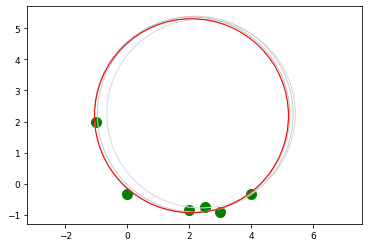

Parameter:
z1:  2.0699744488168332
z2:  2.185667528882253
R:  3.123537912556478
Anzahl der Interationen: 4


In [22]:
########################################################################
# Startparameter (z1, z2, R)
p0 = [2.3794, 2.2532, 3.0370]

# Messpunkte: x Werte gegeben, y Werte werden mit get Points berechnet und mit einer Gaußschen Normalverteilung verrauscht
#(0 = kein Rauschen)
# getPoionts(Messpunkte, Standardabweichung, Radius, z1, z2)
x = getPoints([[-1, 0], [0, 0], [2, 0], [2.5, 0], [3, 0], [4, 0]], 0.1, 3, 2, 2)

#lambda
lamb = 1
# lambda factors
lambda_up = 1.5
lambda_down = 10
########################################################################

# Messpunkte anzeigen
for i in range(np.shape(x)[0]):
    plt.scatter(x[i][0], x[i][1], s=100, facecolors='g', edgecolors='g')

# Levenberg-Marquardt Verfahren anwenden
res = LevenbergMarquardt(nabla_function, p0, x, lamb, lambda_up, lambda_down)

# den letzten Kreis in rot darstellen
circle = plt.Circle((res[0][0], res[0][1]), radius=res[0][2], fc='none', ec='r')
plt.gca().add_patch(circle)

# Schaubild anzeigen
plt.tick_params(axis='both', which='major', labelsize=9)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.axis('equal')
plt.show()

# Resultate anzeigen
print("Parameter:")
print("z1: ", res[0][0])
print("z2: ", res[0][1])
print("R: ", res[0][2])
print("Anzahl der Interationen:", res[1])

<font size="3" face="Verdana">
<p style="text-align:justify"><sup>[1]</sup>Transtrum, M. K., & Sethna, J. P. (2012). Improvements to the Levenberg-Marquardt algorithm for nonlinear least-squares minimization. arXiv preprint arXiv:1201.5885.</p>
</font>